In [1]:
import numpy as np
import matplotlib.pyplot as plt
exp=np.exp
def alpha_m (V):
    return  -0.025*(V+40.)/( exp(-(V+40)/10) - 1.0 )
def beta_m(V):
    return exp(-(V+65)/18)
def mNa_inf(V):
    return alpha_m(V) / (alpha_m(V) + beta_m(V))
def tau_mNa(V):
    return 1 / (alpha_m(V) + beta_m(V))/5
def alpha_h(V):
    return 0.0175*exp(-(V+65)/20)
def beta_h(V):
    return 0.25/(1.0 + exp(-(V+35)/10) )
def hNa_inf(V):
    return alpha_h(V) / (alpha_h(V) + beta_h(V))
def tau_hNa (V):
    return 1 / (alpha_h(V) + beta_h(V))/5
Kdshift=10.0

def alpha_mKd(V):
    return 0.0025*(V+55.)/(1. - exp(-(V+55.)/10.))
                           
beta_mKd = lambda V: 0.03125*exp(-(V+65.)/80.)
mKd_inf = lambda V: alpha_mKd(V-Kdshift) / (alpha_mKd(V-Kdshift) + beta_mKd(V-Kdshift))
tau_mKd = lambda V: 1 / (alpha_mKd(V-Kdshift) + beta_mKd(V-Kdshift))/5 

mA_inf = lambda V: 1/(1+exp(-(V+90)/8.5))
tau_mA = lambda V: 0.37 + 1/(exp((V+35.82)/19.697)+exp((V+79.69)/-12.7))/5 
hA_inf = lambda V: 1/(1+exp((V+78)/6))

def tau_hA(V): # Inactivation time-constant
    if (V < -63):
        tau_hA = 1/(exp((V+46.05)/5)+exp((V+238.4)/-37.45))
    else:
        tau_hA = 19
    return tau_hA/5

mKir_inf = lambda V: 1/(1+exp((V+97.9+10)/9.7))

# T-type Ca-current (mt=activation variable, ht=inactivation variable)
mt_inf = lambda V: 1/(1+exp(-(V+57)/6.2)) # Activation function
tau_mt = lambda V: 0.612 + 1/(exp(-(V+131.6)/16.7)+exp((V+16.8)/18.2)) # Activation time-constant
ht_inf = lambda V:1/(1+exp((V+81)/4.03)) # Inactivation function

def tau_ht(V): # Inactivation time-constant
    if (V < -80):
        tau_ht = exp((V+467)/66.6)
    else:
        tau_ht = (exp(-(V+21.88)/10.2)+28)
    return tau_ht


# L-type Ca-current (mL=activation variable)
mL_inf = lambda V:1/(1+exp(-(V+55.)/3)) # Activation function
tau_mL = lambda V: (72*exp(-(V+45.)**2/400)+6.) # Activation time-constant

# H-current (mH=activation variable)
alpha_mH = lambda V: exp(-14.59-(0.086*V))
beta_mH = lambda V: exp(-1.87+(0.0701*V))
mH_inf = lambda V: alpha_mH(V) /(alpha_mH(V) + beta_mH(V)) # Activation function
tau_mH = lambda V: 1/(alpha_mH(V) + beta_mH(V)) # Activation time-constant

In [2]:

V = np.array(list(range(-120*100,40*100,1)))
V=V/100

In [3]:
mNa = np.zeros(len(V))
taumNa = np.zeros(len(V))
hNa = np.zeros(len(V))
tauhNa = np.zeros(len(V))
mKd = np.zeros(len(V))
taumKd = np.zeros(len(V))
mA = np.zeros(len(V))
taumA = np.zeros(len(V))
hA = np.zeros(len(V))
tauhA = np.zeros(len(V))
mKir = np.zeros(len(V))
mt = np.zeros(len(V))
taumt = np.zeros(len(V))
ht = np.zeros(len(V))
tauht = np.zeros(len(V))
mL = np.zeros(len(V))
taumL = np.zeros(len(V))
mH = np.zeros(len(V))
taumH = np.zeros(len(V))
for i in range(len(V)):
    # Activation functions
    mNa[i] = mNa_inf(V[i])
    hNa[i] = hNa_inf(V[i])
    mKd[i] = mKd_inf(V[i])
    mA[i] = mA_inf(V[i])
    hA[i] = hA_inf(V[i])
    mKir[i] = mKir_inf(V[i])
    mt[i] = mt_inf(V[i])
    ht[i] = ht_inf(V[i])
    mL[i] = mL_inf(V[i])
    mH[i] = mH_inf(V[i])
    
    # Time-constants
    taumNa[i] = tau_mNa(V[i])
    tauhNa[i] = tau_hNa(V[i])
    taumKd[i] = tau_mKd(V[i])
    taumA[i] = tau_mA(V[i])
    tauhA[i] = tau_hA(V[i])
    taumt[i] = tau_mt(V[i])
    tauht[i] = tau_ht(V[i])
    taumL[i] = tau_mL(V[i])
    taumH[i] = tau_mH(V[i])

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [4]:
plt.plot(sol.t, sol.y[0])
plt.figure()
plt.plot(V,mNa,label="m_{Na}")
plt.plot(V,hNa,label="h_{Na}")
plt.plot(V,mKd,label="m_{Kd}")
plt.plot(V,mA,label="m_{A}")
plt.plot(V,hA,label="h_{A}")
plt.plot(V,mKir,label="m_{Kir}")
plt.plot(V,mt,label="m_{t}")
plt.plot(V,ht,label="h_{t}")
plt.plot(V,mL,label="m_{L}")
plt.plot(V,mH,label="m_{H}")
plt.legend()
plt.show()


NameError: name 'sol' is not defined

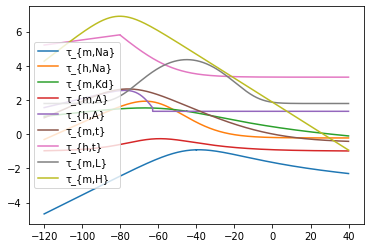

In [5]:
plt.figure()
plt.plot(V,np.log(taumNa),label="τ_{m,Na}")
plt.plot(V,np.log(tauhNa),label="τ_{h,Na}")
plt.plot(V,np.log(taumKd),label="τ_{m,Kd}")
plt.plot(V,np.log(taumA),label="τ_{m,A}")
plt.plot(V,np.log(tauhA),label="τ_{h,A}")
plt.plot(V,np.log(taumt),label="τ_{m,t}")
plt.plot(V,np.log(tauht),label="τ_{h,t}")
plt.plot(V,np.log(taumL),label="τ_{m,L}")
plt.plot(V,np.log(taumH),label="τ_{m,H}")
plt.legend()
plt.show()

In [6]:
heaviside =lambda t:(1+np.sign(t))/2 
pulse =lambda t,ti,tf : heaviside(t-ti)-heaviside(t-tf)
sin=np.sin
pi=np.pi

def HM_ODE(t,u):
    # Parameters
    Iapp=p[0] # Amplitude of constant applied current
    I1=p[1] # Amplitude of first step input
    I2=p[2] # Amplitude of second step input
    ti1=p[3] # Starting time of first step input
    tf1=p[4] # Ending time of first step input
    ti2=p[5] # Starting time of second step input
    tf2=p[6] # Ending time of second step input
    gT=p[7] # T-type calcium current maximal conductance
    gKd=p[8]  # Delayed-rectifier potassium current maximal conductance
    gH=p[9] # H-current maximal conductance
    gNa=p[10] # Sodium current maximal conductance
    gA=p[11] # A-type potassium current maximal conductance
    gKir=p[12]  # Inward-rectifier potassium current maximal conductance
    gLeak=p[13] # Leak current maximal conductance
    gL=p[14] # L-type calcium current maximal conductance
    gKCa=p[15] # Calcium-activated potassium current maximal conductance
    C=p[16] # Membrane capacitance
    taunoise=p[18] # Cutoff frequency for low-pass filtered Gaussian noise
    Ain=p[19] # Amplitude of sinusoïdal inut
    Win=p[20] # Frequency of  sinusoïdal inut

    # Variables
    V=u[0] # Membrane potential
    mNa=u[1] # Sodium current activation
    hNa=u[2] # Sodium current inactivation
    mH=u[3] # H current activation
    mt=u[4] # T-type calcium current activation
    ht=u[5] # T-type calcium current inactivation
    mA=u[6] # A-type potassium current activation
    hA=u[7] # A-type potassium current inactivation
    mKd=u[8] # Delayed-rectifier potassium current activation
    mL=u[9] # L-type calcium current activation
    Ca=u[10] # Intracellular calcium concentration
    noise=u[11] # Input noise

    # ODEs
    du1=1/C*(- gNa*mNa**3*hNa*(V-VNa) - gH*mH*(V-VH) - gT*mt**2*ht*(V-VCa) - gA*mA**4*hA*(V-VK) - gKd*mKd**4*(V-VK) -
                gKir*mKir_inf(V)*(V-VK) - gLeak*(V-Vleak)- gL*mL*(V-VCa) - gKCa*(Ca/(15.0+Ca))**4*(V-VK) +
                Iapp + I1*pulse(t,ti1,tf1) + I2*pulse(t,ti2,tf2) + noise + Ain*sin(2*pi*Win*t)) # Voltage equation
    du2=1/tau_mNa(V)*(-mNa+mNa_inf(V)) # gating equation
    du3=1/tau_hNa(V)*(-hNa+hNa_inf(V))
    du4=1/tau_mH(V)*(-mH+mH_inf(V))
    du5=1/tau_mt(V)*(-mt+mt_inf(V))
    du6=1/tau_ht(V)*(-ht+ht_inf(V))
    du7=1/tau_mA(V)*(-mA+mA_inf(V))
    du8=1/tau_hA(V)*(-hA+hA_inf(V))
    du9=1/tau_mKd(V)*(-mKd+mKd_inf(V))
    du10=1/tau_mL(V)*(-mL+mL_inf(V))
    du11=(-0.1*(gL*mL*(V-VCa))-0.01*Ca)/4 # Variation of intracellular calcium concentration
    du12=-noise/taunoise # Noise equation
    
    return [du1,du2,du3,du4,du5,du6,du7,du8,du9,du10,du11,du12]


In [7]:
from scipy.integrate import solve_ivp
## Simulation of the model in current-clamp mode

## Definition of reversal potential values. 
VNa = 45.; # Sodium reversal potential
VCa = 120.; # Calcium reversal potential
VK = -90.; # Potassium reversal potential
VH= -43.; # Reversal potential for the H-current (permeable to both sodium and potassium ions)
Vleak = -55.; # Reversal potential of leak channels

## Definition of membrane capacitance and maximal conductance values. 
C=0.1; # Membrane capacitance
gLeak=0.1; # Leak current maximal conductance
gNa=120.; # Sodium current maximal conductance
gKd=80.; # Delayed-rectifier potassium current maximal conductance
gA=0.; # A-type potassium current maximal conductance
gKir=0.; # Inward-rectifier potassium current maximal conductance
gT=2.; # T-type calcium current maximal conductance
gH=0.1; # H-current maximal conductance
gL=0.4; # L-type calcium current maximal conductance
gKCa=2.; # Calcium-activated potassium current maximal conductance

## Definition of simulation time.
Tfinal=2800.0
tspan=[0.0,Tfinal]

## Input current defition
# Constant current
Iapp=-2.5

# Current pulses
I1=0. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=103 # Ending time of first pulse
I2=0. # Amplitude of second pulse
ti2=200 # Starting time of second pulse
tf2=203 # Ending time of first pulse

# Sinusoidal input
Ain=0.0 # Amplitude
Win=0.0 # Frequency

# Input noise
NoiseIN=0. # Amplitude
TauNoise=2.0 # Cut-off frequency

## Current-clamp experiment
# Parameter vector for simulations
p=[Iapp,I1,I2,ti1,tf1,ti2,tf2,gT,gKd,gH,gNa,gA,gKir,gLeak,gL,gKCa,C,NoiseIN,TauNoise,Ain,Win]

# Initial conditions
V0= -70.
x0 = [V0,mNa_inf(V0),hNa_inf(V0),mH_inf(V0),mt_inf(V0),ht_inf(V0) ,mA_inf(V0), hA_inf(V0), mKd_inf(V0), mL_inf(V0), -10*gL*mL_inf(V0)*(V0-VCa), 0.0]

# Simulation
#prob = SDEProblem(HM_ODE,σ_HM,x0,tspan,p) # Simulation with noise (SDE)
sol=solve_ivp(HM_ODE ,tspan , x0)




C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:60: Runtim

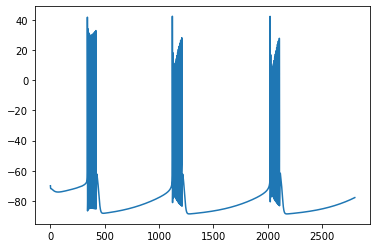

In [8]:
plt.plot(sol.t, sol.y[0])

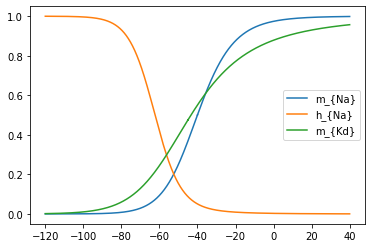

In [15]:
plt.figure()
plt.plot(V,mNa,label="m_{Na}")
plt.plot(V,hNa,label="h_{Na}")
plt.plot(V,mKd,label="m_{Kd}")
plt.legend()
plt.show()

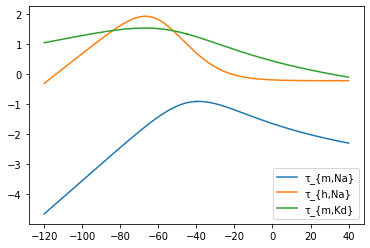

In [16]:
plt.figure()
plt.plot(V,np.log(taumNa),label="τ_{m,Na}")
plt.plot(V,np.log(tauhNa),label="τ_{h,Na}")
plt.plot(V,np.log(taumKd),label="τ_{m,Kd}")
plt.legend()
plt.show()

In [7]:
def INa_ss(V):
    return gNa*mNa_inf(V)**3*hNa_inf(V)*(V-VNa)
def IK_ss(V):
    return gKd*mKd_inf(V)**4*(V-VK)
def I_ss(V):
    Ca=-10*gL*mL_inf(V)*(V-VCa)
    return -(- gNa*mNa_inf(V)**3*hNa_inf(V)*(V-VNa) - gH*mH_inf(V)*(V-VH) - gT*mt_inf(V)**2*ht_inf(V)*(V-VCa) 
                 - gA*mA_inf(V)**4*hA_inf(V)*(V-VK) - gKd*mKd_inf(V)**4*(V-VK) -
                gKir*mKir_inf(V)*(V-VK) - gLeak*(V-Vleak)- gL*mL_inf(V)*(V-VCa) - gKCa*(Ca/(15.0+Ca))**4*(V-VK))

In [21]:
## Simulation of the model in current-clamp mode

## Definition of reversal potential values. 
VNa =45; # Sodium reversal potential 45
VCa = 120.; # Calcium reversal potential
VK = -90.; # Potassium reversal potential -90
VH= -43.; # Reversal potential for the H-current (permeable to both sodium and potassium ions)
Vleak = -55.; # Reversal potential of leak channels

## Definition of membrane capacitance and maximal conductance values. 
C=0.1; # Membrane capacitance
gLeak=0.1; # Leak current maximal conductance

gNa=120.; # Sodium current maximal conductance 120
gKd=30; # Delayed-rectifier potassium current maximal conductance 80
gT=0.; # T-type calcium current maximal conductance 2.
gH=0.; # H-current maximal conductance 0.1
gL=0.; # L-type calcium current maximal conductance 0.4
gKCa=0.; # Calcium-activated potassium current maximal conductance 2.
gA=0.; # A-type potassium current maximal conductance
gKir=0.; # Inward-rectifier potassium current maximal conductance

## Definition of simulation time.
Tfinal=2800.0
tspan=[0.0,Tfinal]

## Input current defition
# Constant current
Iapp=2.5

# Current pulses
I1=0. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=103 # Ending time of first pulse
I2=0. # Amplitude of second pulse
ti2=200 # Starting time of second pulse
tf2=203 # Ending time of first pulse

# Sinusoidal input
Ain=0.0 # Amplitude
Win=0.0 # Frequency

# Input noise
NoiseIN=0. # Amplitude
TauNoise=2.0 # Cut-off frequency

## Current-clamp experiment
# Parameter vector for simulations
p=[Iapp,I1,I2,ti1,tf1,ti2,tf2,gT,gKd,gH,gNa,gA,gKir,gLeak,gL,gKCa,C,NoiseIN,TauNoise,Ain,Win]

# Initial conditions
V0= -70.
x0 = [V0,mNa_inf(V0),hNa_inf(V0),mH_inf(V0),mt_inf(V0),ht_inf(V0) ,mA_inf(V0), hA_inf(V0), mKd_inf(V0), mL_inf(V0), -10*gL*mL_inf(V0)*(V0-VCa), 0.0]




C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


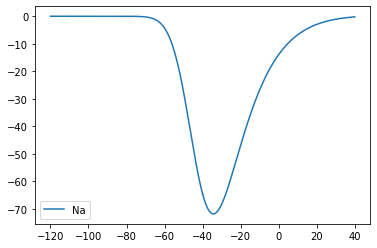

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


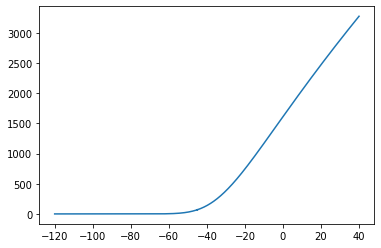

2.4902618832097865


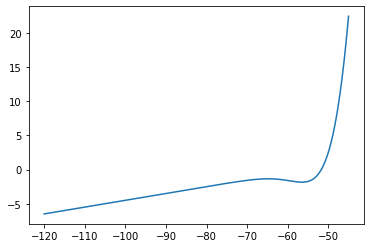

In [22]:
plt.figure()
plt.plot(V,INa_ss(V),label="Na")
plt.legend()
plt.show()
plt.plot(V,IK_ss(V),label="K")
plt.show()
V_2 = np.array(list(range(-120*100,-45*100,1)))
V_2=V_2/100
plt.plot(V_2,I_ss(V_2),label='I')
print(I_ss(-50))

In [23]:
# Simulation
#prob = SDEProblem(HM_ODE,σ_HM,x0,tspan,p) # Simulation with noise (SDE)
sol=solve_ivp(HM_ODE ,tspan , x0)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_l

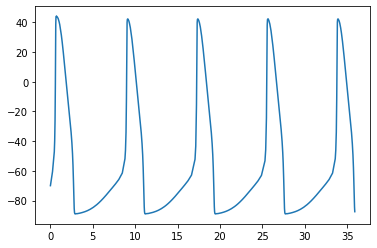

In [24]:
plt.plot(sol.t[0:1000], sol.y[0][0:1000])

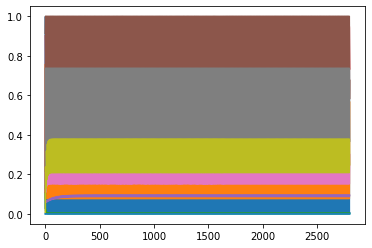

In [25]:
plt.figure()
for i in range(11):
    plt.plot(sol.t,sol.y[1+i])
plt.show()

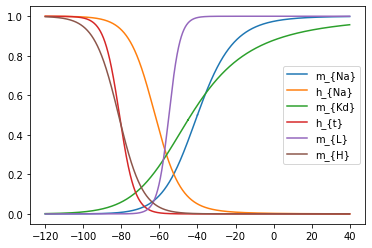

In [428]:
plt.figure()
plt.plot(V,mNa,label="m_{Na}")
plt.plot(V,hNa,label="h_{Na}")
plt.plot(V,mKd,label="m_{Kd}")
plt.plot(V,ht,label="h_{t}")
plt.plot(V,mL,label="m_{L}")
plt.plot(V,mH,label="m_{H}")
plt.legend()
plt.show()


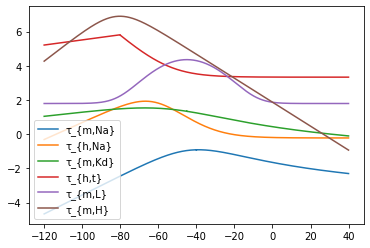

In [429]:
plt.figure()
plt.plot(V,np.log(taumNa),label="τ_{m,Na}")
plt.plot(V,np.log(tauhNa),label="τ_{h,Na}")
plt.plot(V,np.log(taumKd),label="τ_{m,Kd}")
plt.plot(V,np.log(tauht),label="τ_{h,t}")
plt.plot(V,np.log(taumL),label="τ_{m,L}")
plt.plot(V,np.log(taumH),label="τ_{m,H}")
plt.legend()
plt.show()

In [9]:
def IH_ss(V):
    return gH*mH_inf(V)*(V-VH) 
def IT_ss(V):
    return gT*mt_inf(V)**2*ht*(V-VCa)
def IL_ss(V):
    return gL*mL*(V-VCa)
def IKCa_ss(V):
    Ca=-10*gL*mL_inf(V)*(V-VCa)
    return gKCa*(Ca/(15.0+Ca))**4*(V-VK)

In [10]:
## Simulation of the model in current-clamp mode

## Definition of reversal potential values. 
VNa = 45; # Sodium reversal potential 45
VCa = 120.; # Calcium reversal potential
VK = -90.; # Potassium reversal potential -90
VH= -43.; # Reversal potential for the H-current (permeable to both sodium and potassium ions) -43
Vleak = -55.; # Reversal potential of leak channels

## Definition of membrane capacitance and maximal conductance values. 
C=0.1; # Membrane capacitance
gLeak=0.1; # Leak current maximal conductance

gNa=120.; # Sodium current maximal conductance 120
gKd=80; # Delayed-rectifier potassium current maximal conductance 80
gT=0; # T-type calcium current maximal conductance 2.
gH=0; # H-current maximal conductance 0.1
gL=0.4; # L-type calcium current maximal conductance 0.4
gKCa=2.; # Calcium-activated potassium current maximal conductance 2.
gA=0.; # A-type potassium current maximal conductance
gKir=0.; # Inward-rectifier potassium current maximal conductance

## Definition of simulation time.
Tfinal=2500.0
tspan=[0.0,Tfinal]

## Input current defition
# Constant current
Iapp=-1

# Current pulses
I1=0. # Amplitude of first pulse
ti1=100 # Starting time of first pulse
tf1=103 # Ending time of first pulse
I2=0. # Amplitude of second pulse
ti2=200 # Starting time of second pulse
tf2=203 # Ending time of first pulse

# Sinusoidal input
Ain=0.0 # Amplitude
Win=0.0 # Frequency

# Input noise
NoiseIN=0. # Amplitude
TauNoise=2.0 # Cut-off frequency

## Current-clamp experiment
# Parameter vector for simulations
p=[Iapp,I1,I2,ti1,tf1,ti2,tf2,gT,gKd,gH,gNa,gA,gKir,gLeak,gL,gKCa,C,NoiseIN,TauNoise,Ain,Win]

# Initial conditions
V0= -60.
x0 = [V0,mNa_inf(V0),hNa_inf(V0),mH_inf(V0),mt_inf(V0),ht_inf(V0) ,mA_inf(V0), hA_inf(V0), mKd_inf(V0), mL_inf(V0), -10*gL*mL_inf(V0)*(V0-VCa), 0.0]

In [11]:
plt.figure()
plt.plot(V,INa_ss(V),label="Na")
plt.legend()
plt.show()
plt.plot(V,IK_ss(V),label="K")
plt.show()
plt.plot(V,IL_ss(V),label="L")
plt.show()
plt.plot(V,IKCa_ss(V),label="KCa")
plt.show()
V_3 = np.array(list(range(-120*100,-45*100,1)))
V_3=V_3/100
plt.plot(V_3,I_ss(V_3),label='I')
plt.show()
plt.plot(V_3,INa_ss(V_3)+IK_ss(V_3),label='I_fast')
print(I_ss(-68.5))
print(I_ss(-50))

NameError: name 'INa_ss' is not defined

<Figure size 432x288 with 0 Axes>

In [12]:
# Simulation
#prob = SDEProblem(HM_ODE,σ_HM,x0,tspan,p) # Simulation with noise (SDE)
sol=solve_ivp(HM_ODE ,tspan , x0)

C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in exp
C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launch

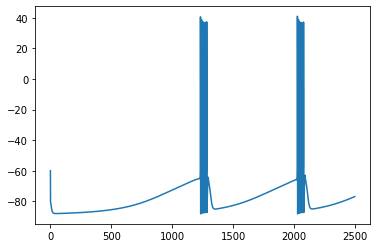

In [13]:
plt.plot(sol.t, sol.y[0])

In [68]:
def HM_ODE_Vclamp(t,u):
    # Parameters
    V0=p[0] # Initial voltage amplitude
    V1=p[1] # Voltage amplitude of voltage step
    ti1=p[2] # Voltage step initiation time
    tf1=p[3] # Voltage step termination time
    gT=p[4] # T-type calcium current maximal conductance
    gKd=p[5] # Delayed-rectifier potassium current maximal conductance
    gH=p[6] # H-current maximal conductance
    gNa=p[7] # Sodium current maximal conductance
    gA=p[8] # A-type potassium current maximal conductance
    gKir=p[9]; # Inward-rectifier potassium current maximal conductance
    gLeak=p[10] # Leak current maximal conductance
    gL=p[11] # L-type calcium current maximal conductance
    gKCa=p[12] # Calcium-activated potassium current maximal conductance
    C=p[13] # Membrane capacitance

    # Variables
    Vdummy=u[0]
    mNa=u[1] # Sodium current activation
    hNa=u[2] # Sodium current inactivation
    mH=u[3] # H current activation
    mt=u[4] # T-type calcium current activation
    ht=u[5] # T-type calcium current inactivation
    mA=u[6] # A-type potassium current activation
    hA=u[7] # A-type potassium current inactivation
    mKd=u[8] # Delayed-rectifier potassium current activation
    mL=u[9] # L-type calcium current activation
    Ca=u[10] # Intracellular calcium concentration

    # Voltage pulse
    V=V0+(V1-V0)*pulse(t,ti1,tf1)

    # ODEs
    du1=0.0
    du2=1/tau_mNa(V)*(-mNa+mNa_inf(V))
    du3=1/tau_hNa(V)*(-hNa+hNa_inf(V))
    du4=1/tau_mH(V)*(-mH+mH_inf(V))
    du5=1/tau_mt(V)*(-mt+mt_inf(V))
    du6=1/tau_ht(V)*(-ht+ht_inf(V))
    du7=1/tau_mA(V)*(-mA+mA_inf(V))
    du8=1/tau_hA(V)*(-hA+hA_inf(V))
    du9=1/tau_mKd(V)*(-mKd+mKd_inf(V))
    du10=1/tau_mL(V)*(-mL+mL_inf(V))
    du11=(-0.1*(gL*mL*(V-VCa))-0.01*Ca)/4
    return[du1,du2,du3,du4,du5,du6,du7,du8,du9,du10,du11]

In [75]:
def solve_HM_ODE_Vclamp(tspan):
    # Parameters
    V0=p[0] # Initial voltage amplitude
    V1=p[1] # Voltage amplitude of voltage step
    ti1=p[2] # Voltage step initiation time
    tf1=p[3] # Voltage step termination time
    gT=p[4] # T-type calcium current maximal conductance
    gKd=p[5] # Delayed-rectifier potassium current maximal conductance
    gH=p[6] # H-current maximal conductance
    gNa=p[7] # Sodium current maximal conductance
    gA=p[8] # A-type potassium current maximal conductance
    gKir=p[9]; # Inward-rectifier potassium current maximal conductance
    gLeak=p[10] # Leak current maximal conductance
    gL=p[11] # L-type calcium current maximal conductance
    gKCa=p[12] # Calcium-activated potassium current maximal conductance
    C=p[13] # Membrane capacitance

    # Simulation of ODEs
    x0 = [V0, mNa_inf(V0), hNa_inf(V0) ,mH_inf(V0), mt_inf(V0), ht_inf(V0), mA_inf(V0), hA_inf(V0), mKd_inf(V0), mL_inf(V0), -10*gL*mL_inf(V0)*(V0-VCa)]
    sol=solve_ivp(HM_ODE_Vclamp ,tspan , x0)

    # Extraction of variable timecourses
    V=V0 +(V1-V0)*pulse(sol.t,ti1,tf1)
    mNa=sol.y[1]
    hNa=sol.y[2]
    mH=sol.y[3]
    mt=sol.y[4]
    ht=sol.y[5]
    mA=sol.y[6]
    hA=sol.y[7]
    mKD=sol.y[8]
    mL=sol.y[9]
    Ca=sol.y[10]

    t = sol.t

    # Computation of total ionic current
   
    Iion = -1/C*(- gNa*mNa**3*hNa*(V-VNa) - gH*mH*(V-VH) - gT*mt**2*ht*(V-VCa) - gA*mA**4*hA*(V-VK) - gKd*mKD**4*(V-VK) - gKir*mKir_inf(V)*(V-VK)  - gLeak*(V-Vleak) - gL*mL*(V-VCa) - gKCa*(Ca/(15.0+Ca))**4*(V-VK))

    return [t, Iion, V]


In [77]:
## Simulation of the model in voltage-clamp mode

## Definition of reversal potential values. 
VNa = 45.; # Sodium reversal potential
VCa = 120.; # Calcium reversal potential
VK = -90.; # Potassium reversal potential
VH= -43.; # Reversal potential for the H-current (permeable to both sodium and potassium ions)
Vleak = -55.; # Reversal potential of leak channels

## Definition of membrane capacitance and maximal conductance values. 
C=0.1; # Membrane capacitance
gLeak=0.1; # Leak current maximal conductance
gNa_VC=gNa; # Sodium current maximal conductance
gKd_VC=gKd; # Delayed-rectifier potassium current maximal conductance
gA_VC=gA; # A-type potassium current maximal conductance
gKir_VC=gKir; # Inward-rectifier potassium current maximal conductance
gT_VC=gT; # T-type calcium current maximal conductance
gH_VC=gH; # H-current maximal conductance
gL_VC=gL; # L-type calcium current maximal conductance
gKCa_VC=gKCa; # Calcium-activated potassium current maximal conductance

## Definition of simulation time.
Tfinal=200.0
tspan=[0.0,Tfinal]

## Definition of voltage step timecourse
ti1=50. # Starting time of voltage step
tf1=Tfinal+1 # Ending time of voltage step

## First voltage clamp experiment
V01=-63.01 # Initial voltage value
V1=V01+30.0 # Voltage step value
p=[V01,V1,ti1,tf1,gT_VC,gKd_VC,gH_VC,gNa_VC,gA_VC,gKir_VC,gLeak,gL_VC,gKCa_VC,C] # Parameter vector 
VC1 = solve_HM_ODE_Vclamp(tspan) # Simulation of first voltage-clamp experiment
t1 = VC1[0]
Iion1 = VC1[1]
Vstep1 = VC1[2]

## Second voltage clamp experiment
V02=-45.1 # Initial voltage value
V2=V02+30.0 # Voltage step value
p=[V02,V2,ti1,tf1,gT_VC,gKd_VC,gH_VC,gNa_VC,gA_VC,gKir_VC,gLeak,gL_VC,gKCa_VC,C] # Parameter vector 
VC2 = solve_HM_ODE_Vclamp(tspan) # Simulation of second voltage-clamp experiment
t2 = VC2[0]
Iion2 = VC2[1]
Vstep2 = VC2[2]




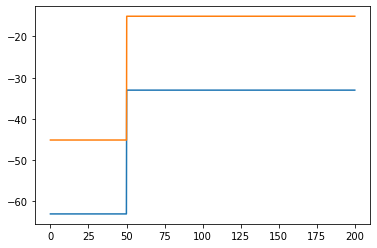

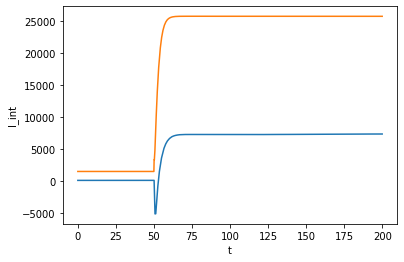

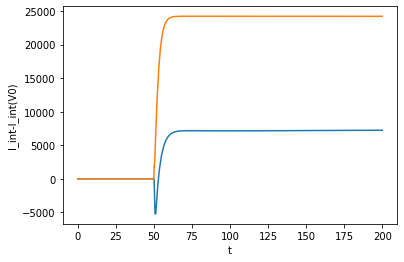

In [83]:
## Generation of figures 
# Voltage commands
plt.figure()
plt.plot(t1,Vstep1)
plt.plot(t2,Vstep2)
plt.show()

# Current responses
plt.figure()
plt.plot(t1,Iion1)
plt.plot(t2,Iion2)
plt.xlabel("t")
plt.ylabel("I_int")
plt.show()
# Current responses normalized to I(V0)
plt.figure()
plt.plot(t1,Iion1-Iion1[0])
plt.plot(t2,Iion2-Iion2[0])
plt.xlabel("t")
plt.ylabel("I_int-I_int(V0)")
plt.show()